**Instalação da Biblioteca Scikit-Fuzzy**

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=b4d909fde033c9f271dbd487d5358778fcecd20953bd6c56206132404b9ec7fd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


**Importação da Biblioteca Scikit-Fuzzy**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [15]:
np.arange(0,11,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
dominio_atc = np.arange(0,11,1)
dominio_atc_preco = np.arange(1,2000,1)
dominio_csq = np.arange(0,11,0.5)

**Antecedente e Consequente**

In [26]:
#definindo os antecedentes #tempo_entrega = ctrl.Antecedent(np.arange())
avaliacao = ctrl.Antecedent(dominio_atc,'avaliacao')
visualizacao = ctrl.Antecedent(dominio_atc, 'visualizacao')
preco = ctrl.Antecedent(dominio_atc_preco, 'preco')
compatibilidade_preferencias = ctrl.Antecedent(dominio_atc, 'compatibilidade_preferencias')

#definindo os consequentes
recomendacao = ctrl.Consequent(dominio_csq, 'recomendacao')

**Funções de Pertinência**

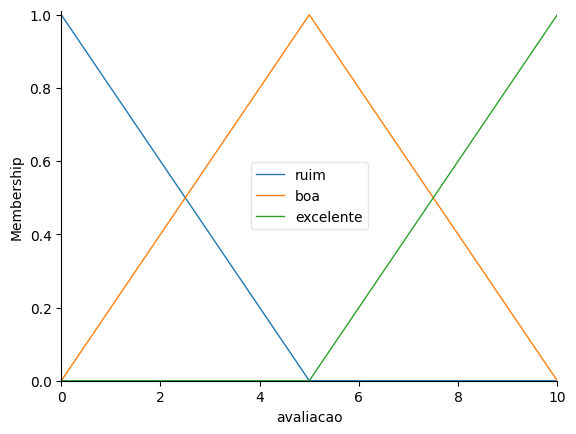

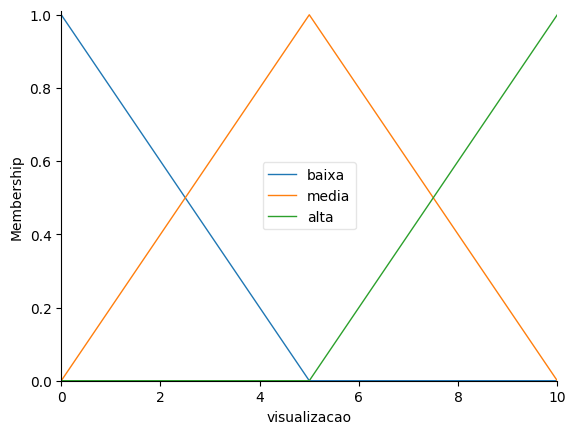

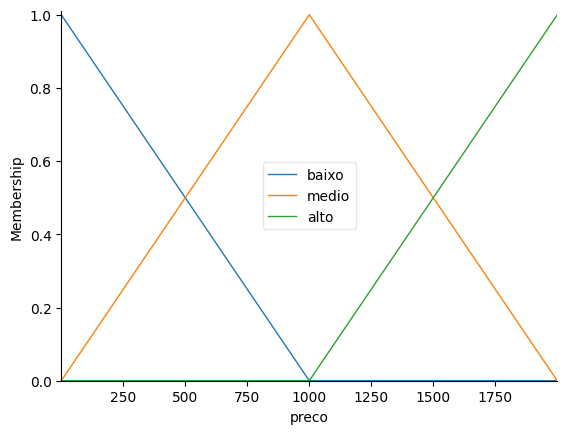

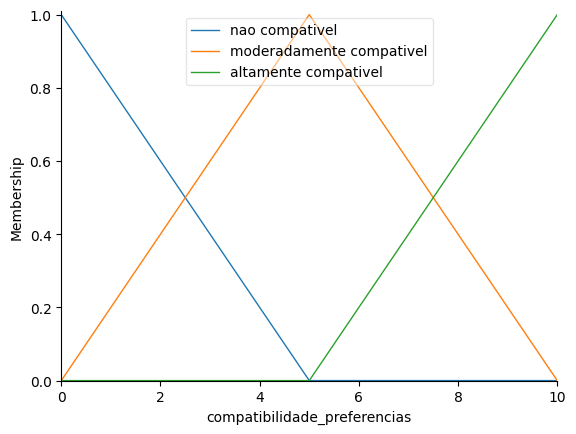

In [27]:
avaliacao.automf(number=3, names=['ruim','boa','excelente'])
visualizacao.automf(number=3, names=['baixa', 'media', 'alta'])
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
compatibilidade_preferencias.automf(number=3, names=['nao compativel', 'moderadamente compativel','altamente compativel'])

avaliacao.view()
visualizacao.view()
preco.view()
compatibilidade_preferencias.view()

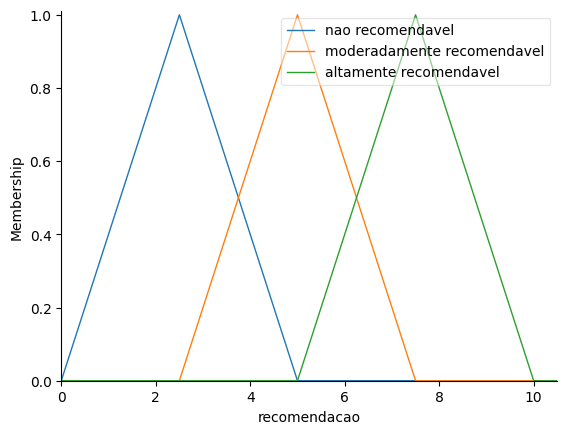

In [28]:
recomendacao['nao recomendavel'] = fuzz.trimf(recomendacao.universe, [0,2.5,5])
recomendacao['moderadamente recomendavel'] = fuzz.trimf(recomendacao.universe, [2.5,5,7.5])
recomendacao['altamente recomendavel'] = fuzz.trimf(recomendacao.universe, [5,7.5,10])
recomendacao.view()

**Instanciando as Regras do Sistema**

In [29]:
regra1 = ctrl.Rule(avaliacao['excelente'] & visualizacao['alta'] & preco['baixo'] & compatibilidade_preferencias['altamente compativel'], recomendacao['altamente recomendavel'])
regra2 = ctrl.Rule(avaliacao['excelente'] & visualizacao['media'] & preco['medio'] & compatibilidade_preferencias['altamente compativel'], recomendacao['altamente recomendavel'])
regra3 = ctrl.Rule(avaliacao['boa'] & visualizacao['media'] & preco['medio'] & compatibilidade_preferencias['altamente compativel'], recomendacao['altamente recomendavel'])
regra4 = ctrl.Rule(avaliacao['boa'] & visualizacao['media'] & preco['medio'] & compatibilidade_preferencias['moderadamente compativel'], recomendacao['moderadamente recomendavel'])
regra5 = ctrl.Rule(avaliacao['boa'] & visualizacao['media'] & preco['alto'] & compatibilidade_preferencias['moderadamente compativel'], recomendacao['moderadamente recomendavel'])
regra6 = ctrl.Rule(avaliacao['boa'] & visualizacao['baixa'] & preco['baixo'] & compatibilidade_preferencias['moderadamente compativel'], recomendacao['moderadamente recomendavel'])
regra7 = ctrl.Rule(avaliacao['ruim'] & visualizacao['alta'] & preco['baixo'] & compatibilidade_preferencias['altamente compativel'], recomendacao['moderadamente recomendavel'])
regra8 = ctrl.Rule(avaliacao['ruim'] & visualizacao['baixa'] & preco['alto'] & compatibilidade_preferencias['nao compativel'], recomendacao['nao recomendavel'])
regra9 = ctrl.Rule(avaliacao['ruim'] & visualizacao['media'] & preco['medio'] & compatibilidade_preferencias['nao compativel'], recomendacao['nao recomendavel'])
regra10 = ctrl.Rule(avaliacao['boa'] & visualizacao['baixa'] & preco['alto'] & compatibilidade_preferencias['nao compativel'], recomendacao['nao recomendavel'])


**Sistema de Controle**

In [30]:
sistema_controle = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9,regra10])


In [31]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [32]:
sistema.input['avaliacao'] = 8
sistema.input['visualizacao'] = 7
sistema.input['preco'] = 150.7
sistema.input['compatibilidade_preferencias'] = 9

In [33]:
sistema.compute()

6.816832824091937


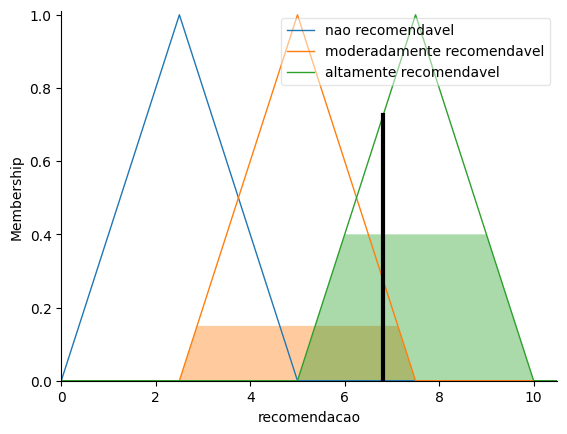

In [34]:
print(sistema.output['recomendacao'])
recomendacao.view(sim=sistema)